In [62]:
import os
import numpy as np

def loadImage():
    name_list = []
    img_list = []
    for filename in os.listdir('dataset'):
        name_list.append(filename)
        img_list.append(np.load('dataset/'+filename))
    return name_list, np.array(img_list)

name_list, img_list = loadImage()

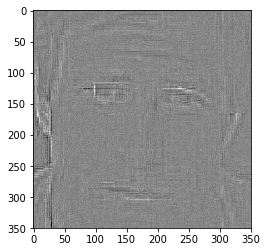

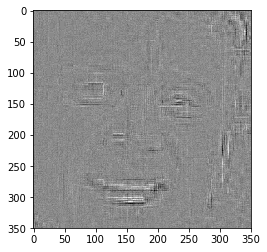

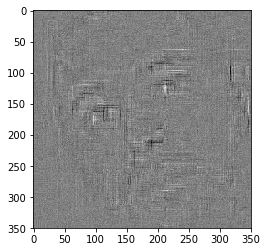

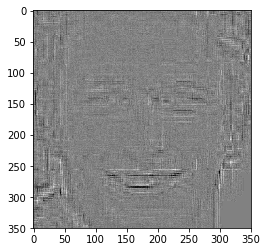

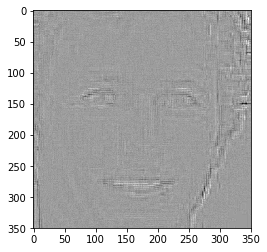

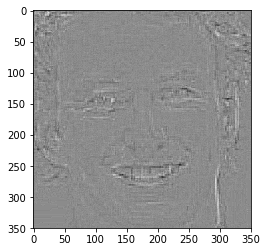

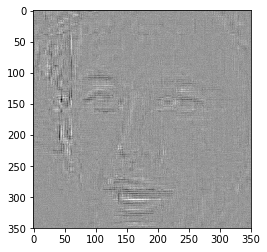

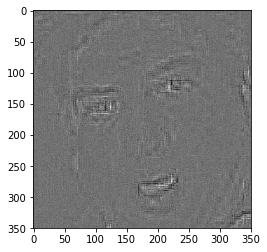

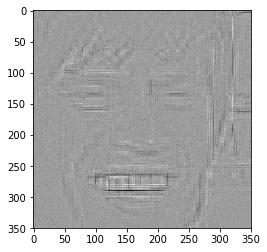

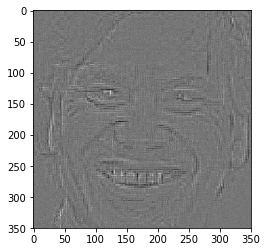

In [69]:
import matplotlib.pyplot as plt
from skimage import color
from skimage import feature
from skimage.io import imread, imshow
from scipy.ndimage.filters import convolve
from skimage.morphology import dilation, disk
from scipy import ndimage as ndi
%matplotlib inline

def normImage(img): # Normalize
    return (img-np.amin(img))/(np.amax(img)-np.amin(img)) # Normalize value to range [0,1]
#     return img/20
#     return img/np.amax(img)

def edgeDetect(img): # Edge detect
    kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    return convolve(img,kernel)

def gaussFilter(img, sigma): # Gaussian filter
    return ndi.gaussian_filter(img, sigma=sigma)

def cannyEdgeDetect(img, sigma): # Edge detect
    return feature.canny(img, sigma=sigma) 

def imgDilation(img): # Dilation
    return dilation(img, disk(1))*255

def convertImage(img): # Convert image for get face shape
    img = normImage(img) 
#     img = edgeDetect(img)
#     img = gaussFilter(img, 4)
    img = cannyEdgeDetect(img, 1)
    img = imgDilation(img)
    return img

for img in img_list[0:10]:
    img = convertImage(img)
    plt.figure()
    plt.imshow(img, cmap='gray')

C:\Users\dolla\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


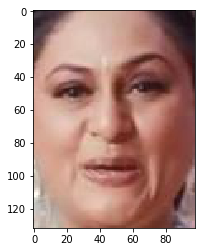

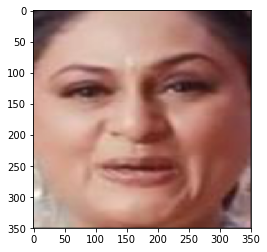

In [29]:
from skimage import transform
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

org = imread('images/Jayamadhuri_32.jpg')
plt.figure()
plt.imshow(org)

img = transform.resize(org,(350,350))
plt.figure()
plt.imshow(img)

C:\Users\dolla\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\dolla\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


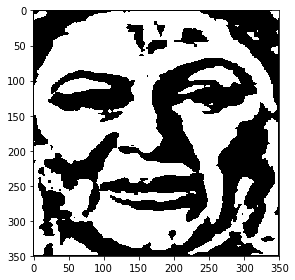

In [30]:
from skimage import color
from skimage.filters import threshold_local

img = color.rgb2gray(img)

block_size = 99

local_thr = threshold_local(img, block_size, method='gaussian') # method have 'gaussian', 'mean'
img = img > local_thr
imshow(img)